# Learning outcomes
1. Overview of CV
2. Revisit some important concepts of images as Numpy array
3. Cropping. Why? One of the data augmentation techniques in deep learning model development.
4. Splitting and merging of color channels
5. Mathematical operations
6. Image blending(add 2 images together)


# Setup (import modules)

In [25]:
import cv2 as cv

def show_img(window_name, img, adjust=False):
    """3 arguments: window name, source images, boolean to adjust to screen size"""
    if adjust:
        cv.namedWindow(window_name, cv.WINDOW_NORMAL)
    else:
        cv.namedWindow(window_name)

    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()


In [26]:
import sys
sys.path
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
from util_func import show_img

np.random.seed(99)

if not cv.useOptimized():
    
    cv.setUseOptimized(True)
    
cv.useOptimized()


True

# Image as Numpy array

In [27]:
img = np.zeros((2, 4), dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


the above img variable belongs to grayscale image. Another primary types of image is color image

In [28]:
img_color = cv.cvtColor( img, cv.COLOR_GRAY2BGR)
print(img_color)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [6]:
img[0, 1] = 50
img[1, 2] = 100
print(img)

[[  0  50   0   0]
 [  0   0 100   0]]


In [32]:
img_color1 = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color1)

##for RGB, no matter what color, if R G B three are same values, the color will be gray

[[[  0   0   0]
  [ 50  50  50]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [100 100 100]
  [  0   0   0]]]


## Access elements in an array

In [33]:
img = cv.imread("images/lena.jfif")

a = img[49, 199, 2]

b = img.item(49, 199, 2)

a == b

True

In [34]:
%timeit a =img[49, 199, 2]
%timeit b =img.item(49, 199, 2)

86.5 ns ± 1.12 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
80 ns ± 0.898 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


# Numpy array slicing

In [35]:
# Extract the top left region of lena image
show_img("lena", img)

In [37]:
h, w = img.shape[:2]

topleft = img[:h//2, :w//2]

show_img("topleft", topleft)

In [38]:
# extract central region of the image
yc, xc = h//2, w//2

centre = img[yc-30:yc+30, xc-30:xc+30]

show_img("centre", centre)


In [66]:
# create white image
#white = np.zeros((200,200)) + 255
#white = np.uint8(white)

#white = np.ones((200,200)) * 255
#white = np.uint8(white)

white = np.ones((200,200))

show_img("white", white)

In [12]:
# extract flower
img = cv.imread("images/flower.jfif")

show_img("flower", img)

In [41]:
[i for i in dir(cv) if i.startswith('')]

['ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AffineFeature',
 'AffineFeature_create',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'B

In [13]:
# 1 way: callback function
img = cv.imread("images/flower.jfif")
img_copy = img.copy()

def rect_region(event, x, y, flags, params):
    #This is mouseclick callback function
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        cv.circle(img, (x,y), 1, (0, 0 ,255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", rect_region)
cv.waitKey(0)
cv.destroyAllWindows()

# y is height
# x is width

# result:
# x1 y1
# x2 y2

(87, 36)
(182, 126)


In [14]:
flower = img_copy[36:126, 87:182] #y1:y2, x1:x2
#dog = img_copy[23:160, 103:185] #y1:y2, x1:x2
show_img("flower", flower)

In [ ]:
# 2 

img = cv.imread("images/dog.jfif")
bbox = cv.selectROI("img", img)

# (x, y, w, h)
dog = img[int(bbox[1]): int(bbox[1]+bbox[3]),
         int(bbox[0]): int(bbox[0]+bbox[2])]

show_img("dog", dog)

In [48]:
# 3: paint app

In [4]:
# generate a repeating pattern
img_arr = np.zeros((30, 30), dtype = np.uint8)

img_arr[:10, 10:20] = 255
img_arr[10:20, :10] = 255
img_arr[10:20, 20:] = 255
img_arr[20:, 10:20] = 255

img = np.tile(img_arr, (3, 3))

show_img("pattern", img)


# image cropping
why:
    - remove unwanted objects
    - rule of thirds. Separate images into $3 \times $3 grids, and we place our camera in a way such that the object of interest is on the grid line or its intersection, the picture would look more appealing
    - one of the data augmentated data techniques

In [5]:
img = cv.imread('images/dog.jfif')
img_copy = img.copy()

#parameter definition

h, w = img.shape[: 2]
n_vertical_grids = 4
n_horizontal_grids = 4

# We need to get the number of pixel for column and row
M = int(h/n_vertical_grids)
N = int(w/n_horizontal_grids)

tiles = []
for y in range(0, h, M):
    for x in range(0, w, N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0, 255, 0), 1)
            tile = img[y: h, x:w]
            tiles.append(tile)
            
        elif y1 >= h:
            y1 = h - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0, 255, 0), 1)
            tile = img[y: h, x:x1]
            tiles.append(tile)
            
        elif x1 >= w:
            x1 = w - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0, 255, 0), 1)
            tile = img[y: y1, x:w]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy, (x,y), (x1,y1), (0, 255, 0), 1)
            tile = img[y: y1, x:x1]
            tiles.append(tile)
            
cv.imshow('patched image', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

In [55]:
show_img("patch", tiles[5])

## Splitting and merging of color channels


In [9]:
img = cv.imread("images/lena.jfif")
# split image into separate channels
b, g, r = cv.split(img)
# merge
img_merge = cv.merge((b, g, r))

#test if the two arrays are the same
np.array_equal(img, img_merge)

True

In [10]:
import matplotlib.pyplot as plt

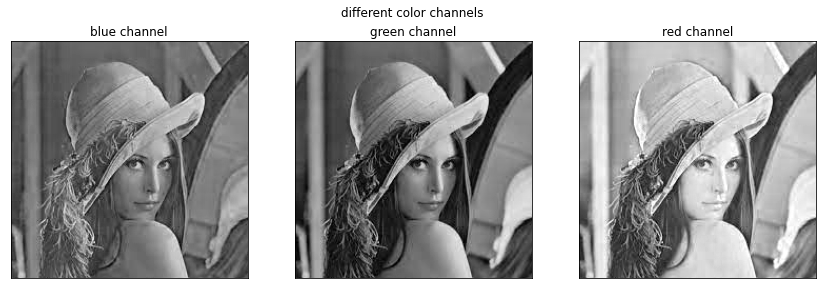

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4), sharey= True)
fig.suptitle("different color channels")

ax1.imshow(b, cmap = plt.cm.gray)
ax1.set(title="blue channel", xticks=[], yticks=[])

ax2.imshow(g, cmap = plt.cm.gray)
ax2.set(title="green channel", xticks=[], yticks=[])

ax3.imshow(r, cmap = plt.cm.gray)
ax3.set(title="red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

# the brighter the channel, the original pic will show more the color of the channel

## Exercise

In [13]:
### Apply color filter
img = cv.imread("images/dog.jfif")

colors = ("blue", "green", "red")

channels = cv.split(img)

imgs = []
for i, ch in enumerate(channels):
    img_arr = np.zeros_like(img)
    img_arr[:, :, i] = ch
    imgs.append(img_arr)
    
for img, c in zip(imgs, colors):
    cv.imshow(c, img)

cv.waitKey(0)
cv.destroyAllWindows()

## Point operators (mathematical operations)

####   f'(x) = af(x) + b
####   a > 1 -> enhance image contrast
####   b > 0 -> increase brightness
####   0 < a < 1 -> decrease contrast
####   b < 0 -> decrease brightness

$$f_{trans} (\textbf{x}) = \alpha f(\textbf{x}) + \beta$$

In [29]:
np.uint8(np.array([-2, 0, 255, 300]))
# result showing 256-2 and 300-256, dun wan this, wan -2->0, 300->255

array([254,   0, 255,  44], dtype=uint8)

In [30]:
# Lets define the point operator function (multiplication, addition, subtraction and division)
def point_op(img, alpha, beta):
    """point operators. Argument:
    1. Source image
    2. multiplier
    3. constant
    img: input image
    alpha: coefficient
    beta: bias
    """
    img = img.astype(np.float32)
    res = alpha * img + beta
    # clip the pixel values 
    res = np.clip(res, 0, 255)
    res = np.uint8(res)
    
    return res


In [35]:
# enhance brightness and contrast
img = cv.imread("images/bridge.jfif")

transform = point_op(img, 2, 30)

cv.imshow("original", img)
show_img("transform", transform)

In [36]:
transform2 = point_op(img, 1, -80)

cv.imshow("original", img)
show_img("transform2", transform2)

## Gamma Correction

$$O = (\frac{I}{255})^{\gamma} \times 255 $$

In [37]:
gamma = 1/ 2.2

lookUpTable = np.empty((1, 256), dtype= np.uint8)

for i in range (256):
    lookUpTable[0, i] = np.clip(pow(i / 255, gamma) * 255, 0, 255)
    
img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("original", cv.WINDOW_NORMAL)
# cv.namedWindow("results", cv.WINDOW_NORMAL)
cv.imshow("original", img)
show_img("gamma correction", res, adjust=True)

## image blending (add 2 images together
get a sense of transparency

$$g(\textbf{x}) = \alpha f(\textbf{x}) + (1 - \alpha)h(\textbf{x}) + \beta$$

In [39]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")


# resize img2
alpha = 0.4 # try 0.4 and 0.8
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

# blending
res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow('lena', img)
cv.imshow('reshaped coin', img2)
cv.imshow('blending', res)
cv.waitKey(0)
cv.destroyAllWindows()

### Exercise 1

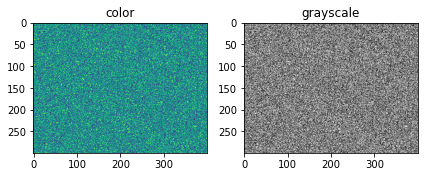

In [113]:
w, h = 400, 300

num_pixels = w * h

pixel_values = np.random.randint(0, 256, num_pixels, dtype=np.uint8)

grayscale_image = np.reshape(pixel_values, (h, w))
plt.subplot(122)
plt.imshow(grayscale_image, cmap = "gray")
plt.title("grayscale")

color_image = np.reshape(pixel_values, (h, w))
plt.subplot(121)
plt.imshow(color_image)
plt.title("color")

plt.tight_layout()
plt.show()

### Exercise 2

In [71]:
#crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
# img is the source image
# num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
# line_color is the color of the grid line.
# The output of the function should be image with grids

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    
    height, width = img.shape[:2]
    
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)

    x1, y1 = 0, 0
    
    for y in range(0, height, M):
        for x in range(0, width, N):
        
            y1 = y + M
            x1 = x + N
        
            if x1>=width and y1>=height:
                x1 = width-1
                y1 = height-1
                tile = img[y:height, x:width]
                cv.rectangle(img, (x,y), (x1, y1), line_color, 1)
                cv.imshow('tile', tile)
            
            elif y1>=height:
                y1 = height-1
                cv.rectangle(img, (x, y), (x1, y1), line_color, 1)
            
            elif x1>=width:
                x1 = width-1
                cv.rectangle(img, (x, y), (x1, y1), line_color, 1)
            
            else:
                cv.rectangle(img, (x, y), (x1, y1), line_color, 1)
            
    cv.imshow('patched image', img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [73]:
img = cv.imread("images/dog.jfif")
crop_grid(img, 4, 5, (0, 255, 0))

### Exercise 3

In [83]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

# resize img2
for alpha in np.arange(0, 1.1, 0.1):
    # blending
    res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

    #cv.imshow('lena', img)
    #cv.imshow('reshaped coin', img2)
    cv.imshow('blending', res)
    cv.waitKey(0)
    cv.destroyAllWindows()




#### alpha > 0.5 and above, img in front
#### alpha < 0.5 and below, img2 in front
#### the bigger the alpha value, the higher the transparency of img and vice versa


### Swapping regions (exercise)

In [132]:
# 1
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

#print(img.shape)
#168, 300, 3
h, w = img.shape[:2]

#center
y, x = h // 2, w // 2
img_copy[y: , x:] = img[:y, :x]
img_copy[y: , :x] = img[:y, x:]
img_copy[:y , :x] = img[y:, x:]
img_copy[:y , x:] = img[y:, :x]

show_img("swapped regions", img_copy)

In [136]:
img = cv.imread("images/lena.jfif")
img_copy = img.copy()

def rect_region(event, x, y, flags, params):
    #This is mouseclick callback function
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        cv.circle(img, (x,y), 1, (0, 0 ,255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", rect_region)
cv.waitKey(0)
cv.destroyAllWindows()

# y is height
# x is width

# result:
# x1 y1
# x2 y2

(87, 84)
(162, 171)


In [138]:
img = cv.imread("images/lena.jfif")

##print(img.shape)
##(225, 225, 3)

img[84: 171, 87:162] = [255, 255, 255]

show_img("lena", img)